#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [8]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [9]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/Iteration4_40000samples_kohonen/atriumSimplifiedSDA+ASE+View_v4_40000samples.csv', delimiter= " ")
#pd.set_option('display.max_columns', None)
#data.dropna(inplace=True)

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  40000 non-null  float64
 1   typicalFacadeWindowWidth   40000 non-null  float64
 2   groundFacadeGlazingRatio   40000 non-null  float64
 3   groundFacadeWindowWidth    40000 non-null  float64
 4   buildingDepth              40000 non-null  float64
 5   balconyWidth               40000 non-null  float64
 6   atriumArea                 40000 non-null  float64
 7   aspectRatio                40000 non-null  float64
 8   groundFloorHeight          40000 non-null  float64
 9   typicalfloorHeight         40000 non-null  float64
 10  numberLevels               40000 non-null  float64
 11  groundSDA                  40000 non-null  float64
 12  firstSDA                   40000 non-null  float64
 13  groundASE                  40000 non-null  flo

In [12]:
data.shape

(40000, 17)

In [13]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

typicalFacadeGlazingRatio min_val 0.1 max_val 1.0
typicalFacadeWindowWidth min_val 0.2 max_val 2.0
groundFacadeGlazingRatio min_val 0.1 max_val 1.0
groundFacadeWindowWidth min_val 0.2 max_val 3.0
buildingDepth min_val 0.9 max_val 39.8
balconyWidth min_val 0.1 max_val 2.9
atriumArea min_val 19.1 max_val 3942.0
aspectRatio min_val 0.1 max_val 1.3
groundFloorHeight min_val 0.3 max_val 6.0
typicalfloorHeight min_val 0.2 max_val 3.1
numberLevels min_val 0.2 max_val 9.9
groundSDA min_val 1.7 max_val 100.0
firstSDA min_val 2.2 max_val 99.3
groundASE min_val 1.2 max_val 61.3
firstASE min_val 1.2 max_val 31.6
groundViewPercentage min_val 1.5 max_val 89.9
firstViewPercentage min_val 1.8 max_val 89.7


##Prepare Data

**NORMALIZE INPUTS**

In [14]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data[["typicalFacadeGlazingRatio", "typicalFacadeWindowWidth", "groundFacadeGlazingRatio", "groundFacadeWindowWidth", "buildingDepth", "balconyWidth", "atriumArea", "aspectRatio", "groundFloorHeight", "typicalfloorHeight", "numberLevels"]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(40000, 11)


In [15]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE", "groundViewPercentage", "firstViewPercentage"]].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(40000, 6)
[[0.         0.         0.         0.         0.         0.        ]
 [0.02441506 0.01441813 0.0249584  0.00986842 0.02941176 0.01934016]
 [0.03051882 0.01956746 0.0266223  0.00328947 0.02828054 0.02389078]
 ...
 [0.31332655 0.26467559 0.23460899 0.20723684 0.35294118 0.33788396]
 [0.30925738 0.25952626 0.2312812  0.22039474 0.34954751 0.3367463 ]
 [0.3051882  0.25643666 0.22628952 0.21052632 0.34728507 0.32878271]]


**SPLIT INTO TRAIN AND TEST**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [17]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (32000, 11) output (32000, 6)
TEST input (8000, 11) output (8000, 6)
[[-1.55175269 -0.88922651 -2.21081076 ... -0.26049164 -0.64402885
  -0.81947733]
 [ 1.40284116  1.78380744  0.84392919 ...  2.88056359  2.21385158
  -1.22243819]
 [-0.81310423 -0.55509727 -1.44712578 ...  0.41259163  0.01548202
  -0.09414778]
 ...
 [-0.07445577  0.11316122 -0.68344079 ... -0.48485272  0.23531897
   0.79236612]
 [-1.55175269 -0.55509727  0.0802442  ... -1.04575544 -0.64402885
  -0.33592429]
 [ 0.6641927  -0.55509727  0.84392919 ... -0.03613055 -0.4241919
  -0.0135556 ]]
[[0.43336724 0.37281153 0.34608985 0.31907895 0.43552036 0.40614334]
 [0.97761953 0.9454171  0.92512479 0.91447368 0.98076923 0.88850967]
 [0.54018311 0.46138002 0.4109817  0.39144737 0.60520362 0.58020478]
 ...
 [0.39165819 0.32440783 0.24958403 0.27302632 0.61085973 0.592719  ]
 [0.32960326 0.27806385 0.22795341 0.24013158 0.47058824 0.45506257]
 [0.45167854 0.38722966 0.33943428 0.33223684 0.55090498 0.5221843 ]]


#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [18]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(24, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                288       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
Total params: 666
Trainable params: 666
Non-trainable params: 0
_________________________________________________________________


#Train model

In [20]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
800/800 [==============================] - 2s 2ms/step - loss: 0.0272 - val_loss: 0.0026
Epoch 2/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/200
800/800 [==============================] - 1s 2ms/step - loss: 8.0483e-04 - val_loss: 6.1491e-04
Epoch 4/200
800/800 [==============================] - 2s 2ms/step - loss: 5.3203e-04 - val_loss: 4.4368e-04
Epoch 5/200
800/800 [==============================] - 1s 2ms/step - loss: 4.1593e-04 - val_loss: 4.1865e-04
Epoch 6/200
800/800 [==============================] - 1s 2ms/step - loss: 3.5506e-04 - val_loss: 3.5440e-04
Epoch 7/200
800/800 [==============================] - 1s 2ms/step - loss: 3.2046e-04 - val_loss: 3.0869e-04
Epoch 8/200
800/800 [==============================] - 1s 2ms/step - loss: 2.9918e-04 - val_loss: 3.0348e-04
Epoch 9/200
800/800 [==============================] - 1s 2ms/step - loss: 2.8831e-04 - val_loss: 3.5334e-04
Epoch 10/200
800/800 [=============

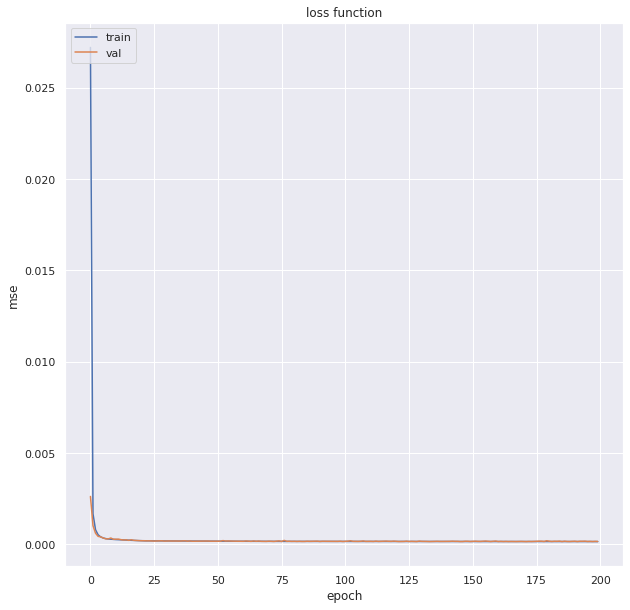

In [21]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [22]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

250/250 [==============================] - 0s 1ms/step - loss: 1.6530e-04
mse_test: 0.00016529971617273986


#Plot error


In [23]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

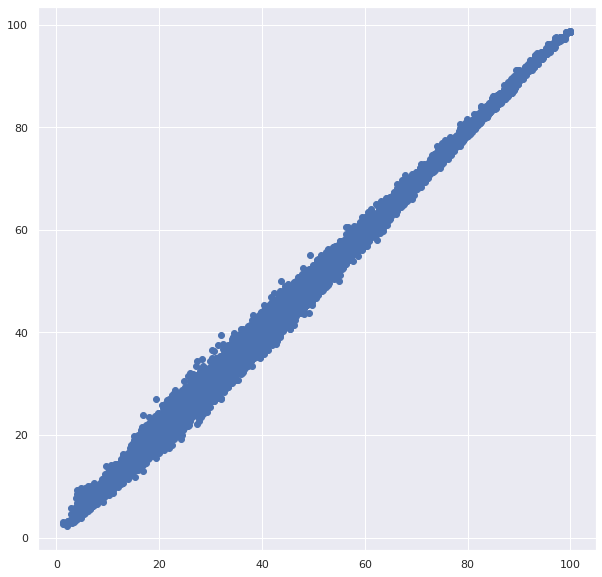

In [24]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

In [38]:
#GROUND VIEW PREDICTIONS
y_pred_01 = y_pred[:,4]
print(y_pred_01.shape)

(8000,)


In [39]:
#GROUND VIEW TRUTH
y_truth_01 = y_truth[:,4]
print(y_truth_01.shape)

(8000,)


In [40]:
groundWindowWidth = (scalerX.inverse_transform(X_test)[:,3])

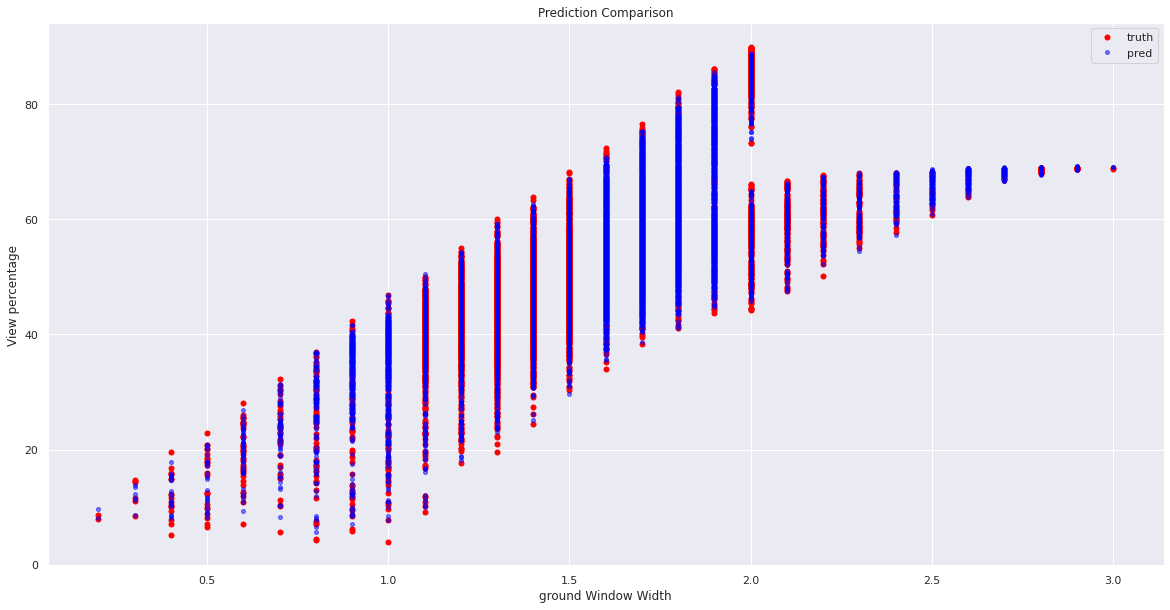

In [41]:
#PLOT DAYLIGHT 
plot_comparison(groundWindowWidth, y_pred_01, y_truth_01, "ground Window Width", "View percentage")

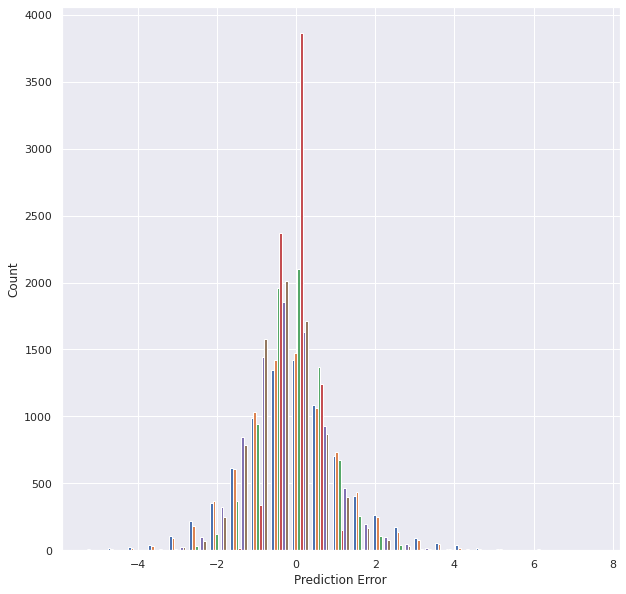

In [42]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

model saving

In [29]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/atriumModel1.h5")



scalerX_filename = "/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)


['/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerYAtoB.save']